<a href="https://colab.research.google.com/github/SIES123/Assignment2_B3Batch/blob/day22/aids_assign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy tensorflow scikit-learn



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from google.colab import files
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


uploaded = files.upload()

Saving cyber_security_dataset.csv to cyber_security_dataset.csv


In [5]:

print(uploaded.keys())
data = pd.read_csv(next(iter(uploaded)))
print(data)

data = pd.get_dummies(data, columns=['Protocol', 'IP_Address'], drop_first=True)
print(data)

X = data.drop('Is_Malicious', axis=1)
y = data['Is_Malicious']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


dict_keys(['cyber_security_dataset.csv'])
        IP_Address  Port_Number Protocol  Bytes_Sent  Bytes_Received  \
0    192.168.1.103        56580      TCP       35347           43018   
1    192.168.1.180        41543      UDP       94858           52324   
2     192.168.1.93        54288      UDP       91847           39398   
3     192.168.1.15        45171     ICMP       62852           80319   
4    192.168.1.107        22423      UDP       56673           61729   
..             ...          ...      ...         ...             ...   
195  192.168.1.205        60555      UDP       55871            6190   
196  192.168.1.179        59060      UDP       57899           11737   
197   192.168.1.63        12203      UDP       13216           22515   
198   192.168.1.96        29319      TCP       25570           24171   
199  192.168.1.231        12894      UDP       42444           58343   

     Packet_Count  Is_Malicious  
0             360             1  
1             900        

In [6]:

model = Sequential()


model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Tra# Step 1: Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Make predictions
predictions = (model.predict(X_test) > 0.5).astype('int32')

# Display some predictions alongside actual values
print("Predictions:\n", predictions[:10])
print("Actual:\n", y_test[:10].values)

# Step 3: Bar Graph: Actual vs Predicted Counts
actual_counts = pd.Series(y_test.values).value_counts()
predicted_counts = pd.Series(predictions.flatten()).value_counts()

plt.figure(figsize=(10, 5))

# Bar chart for actual vs predicted
plt.subplot(1, 2, 1)
sns.barplot(x=actual_counts.index, y=actual_counts.values, palette='Blues')
plt.title("Actual Count of Benign (0) vs Malicious (1)")
plt.ylabel("Count")
plt.xlabel("Activity Type")

plt.subplot(1, 2, 2)
sns.barplot(x=predicted_counts.index, y=predicted_counts.values, palette='Greens')
plt.title("Predicted Count of Benign (0) vs Malicious (1)")
plt.ylabel("Count")
plt.xlabel("Activity Type")

plt.tight_layout()
plt.show()

# Step 4: Line Plot: Training Accuracy and Loss Over Epochs
plt.figure(figsize=(12, 5))

# Plotting the accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 5: Pie Chart: Distribution of Predicted Classes
plt.figure(figsize=(7, 7))
plt.pie(predicted_counts, labels=['Benign', 'Malicious'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=90)
plt.title('Distribution of Predicted Benign vs Malicious Activities')
plt.show()

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5050 - loss: 0.7427 - val_accuracy: 0.5500 - val_loss: 0.7234
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5622 - loss: 0.6864 - val_accuracy: 0.4500 - val_loss: 0.7193
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6108 - loss: 0.6442 - val_accuracy: 0.5000 - val_loss: 0.7234
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7158 - loss: 0.6033 - val_accuracy: 0.5167 - val_loss: 0.7322
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7535 - loss: 0.5695 - val_accuracy: 0.5000 - val_loss: 0.7371
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7875 - loss: 0.5611 - val_accuracy: 0.5167 - val_loss: 0.7474
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8463 - loss: 0.5122 - val_accuracy: 0.5167 - val_loss: 0.7620
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8422 - loss: 0.4919 - val_accuracy: 0.5167 - val_loss: 0.7731


In [8]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4681 - loss: 1.1221 
Test Accuracy: 48.33%


In [9]:
# Make predictions on the test data
predictions = (model.predict(X_test) > 0.5).astype('int32')

# Display some predictions alongside actual values
print("Predictions:\n", predictions[:10])
print("Actual:\n", y_test[:10].values)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predictions:
 [[1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]
Actual:
 [0 0 1 0 0 0 0 0 0 0]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Predictions:
 [[1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]
Actual:
 [0 0 1 0 0 0 0 0 0 0]


<ipython-input-10-555338c8b50a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actual_counts.index, y=actual_counts.values, palette='Blues')
<ipython-input-10-555338c8b50a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=predicted_counts.index, y=predicted_counts.values, palette='Greens')


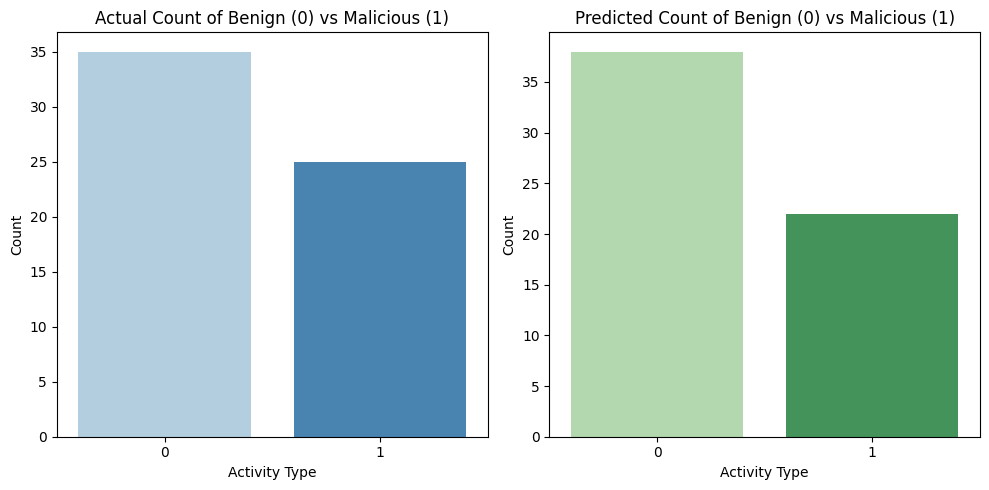

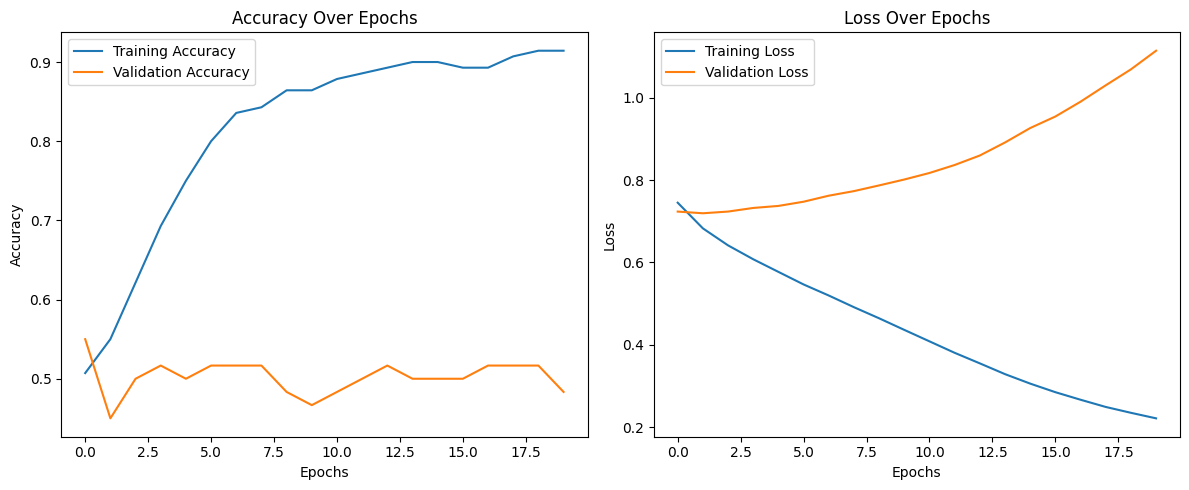

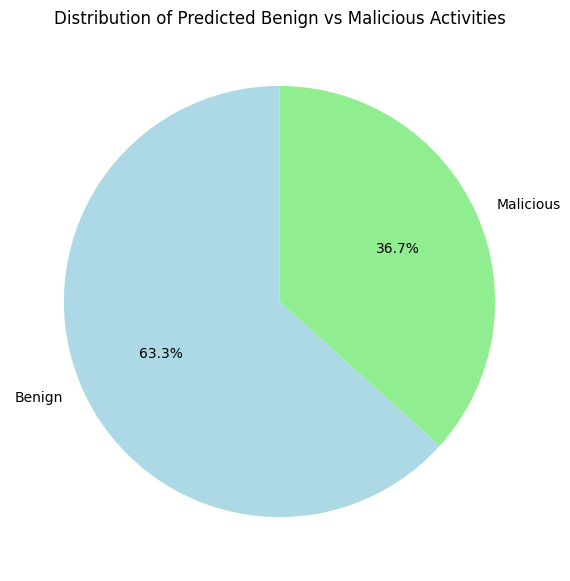

In [10]:
# Step 1: Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Make predictions
predictions = (model.predict(X_test) > 0.5).astype('int32')

# Display some predictions alongside actual values
print("Predictions:\n", predictions[:10])
print("Actual:\n", y_test[:10].values)

# Step 3: Bar Graph: Actual vs Predicted Counts
actual_counts = pd.Series(y_test.values).value_counts()
predicted_counts = pd.Series(predictions.flatten()).value_counts()

plt.figure(figsize=(10, 5))

# Bar chart for actual vs predicted
plt.subplot(1, 2, 1)
sns.barplot(x=actual_counts.index, y=actual_counts.values, palette='Blues')
plt.title("Actual Count of Benign (0) vs Malicious (1)")
plt.ylabel("Count")
plt.xlabel("Activity Type")

plt.subplot(1, 2, 2)
sns.barplot(x=predicted_counts.index, y=predicted_counts.values, palette='Greens')
plt.title("Predicted Count of Benign (0) vs Malicious (1)")
plt.ylabel("Count")
plt.xlabel("Activity Type")

plt.tight_layout()
plt.show()

# Step 4: Line Plot: Training Accuracy and Loss Over Epochs
plt.figure(figsize=(12, 5))

# Plotting the accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Pie Chart: Distribution of Predicted Classes
plt.figure(figsize=(7, 7))
plt.pie(predicted_counts, labels=['Benign', 'Malicious'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=90)
plt.title('Distribution of Predicted Benign vs Malicious Activities')
plt.show()
